In [1]:
import warnings 
warnings.filterwarnings('ignore')

#Import all the necessary modules.
#Import pandas, numpy and seaborn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Import SimpleImputer
from sklearn.impute import SimpleImputer

#Import train and test split function
from sklearn.model_selection import train_test_split

#Import KNeighbours classifier
from sklearn.neighbors import KNeighborsClassifier

#Import Standard Scaler
from sklearn.preprocessing import StandardScaler

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 

#Cross Val Score for accuracy
from sklearn.model_selection import cross_val_score

#Import sklearn.preprocessing
from sklearn import preprocessing

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [2]:
#Load data
#Read iris.data file
columnname=['Sepal Length (in cm)','Sepal Width in (cm)','Petal length (in cm)',
         'Petal width (in cm)','Class']
iris = pd.read_csv('iris.data', sep=",", delimiter=None, names=columnname, header=None)

#Print 10 random rows
iris.sample(10)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
131,7.9,3.8,6.4,2.0,Iris-virginica
85,6.0,3.4,4.5,1.6,Iris-versicolor
81,5.5,2.4,3.7,1.0,Iris-versicolor
83,6.0,2.7,5.1,1.6,Iris-versicolor
5,5.4,3.9,1.7,0.4,Iris-setosa
31,5.4,3.4,1.5,0.4,Iris-setosa
127,6.1,3.0,4.9,1.8,Iris-virginica
135,7.7,3.0,6.1,2.3,Iris-virginica
12,4.8,3.0,1.4,0.1,Iris-setosa
84,5.4,3.0,4.5,1.5,Iris-versicolor


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [3]:
#Checking for missing values in given dataset
iris.isnull().sum()

Sepal Length (in cm)    0
Sepal Width in (cm)     0
Petal length (in cm)    0
Petal width (in cm)     0
Class                   0
dtype: int64

In [4]:
#Insight: In the given dataset there are no missing values.
#If at all there are any missing values in dataset, we can perform the below steps to 
#impute missing values with Median of the same column.

In [5]:
#Impute the values using scikit-learn SimpleImpute Class
columns=['Sepal Length (in cm)','Sepal Width in (cm)','Petal length (in cm)',
         'Petal width (in cm)']

#Create the imputer for median of the column
imp_median = SimpleImputer(strategy='median')

#Fit the imputer on the selected columns
imp_median.fit(iris[columns])

#Impute all the missing values in the selected columns
imputed_df = imp_median.transform(iris[columns])

#Apply the imputed values to the main data frame
iris[columns]=pd.DataFrame(imputed_df,columns=columns)

#Print the data post imputation
iris.sample(5)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
14,5.8,4.0,1.2,0.2,Iris-setosa
84,5.4,3.0,4.5,1.5,Iris-versicolor
106,4.9,2.5,4.5,1.7,Iris-virginica
42,4.4,3.2,1.3,0.2,Iris-setosa
49,5.0,3.3,1.4,0.2,Iris-setosa


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [6]:
#converts categorical data to numerical data
le = preprocessing.LabelEncoder()
iris['Class']=le.fit_transform(iris['Class'])
iris.sample(5)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
140,6.7,3.1,5.6,2.4,2
14,5.8,4.0,1.2,0.2,0
116,6.5,3.0,5.5,1.8,2
26,5.0,3.4,1.6,0.4,0
129,7.2,3.0,5.8,1.6,2


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [7]:
#Association of each individual variable with target
iris.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757,0.949043
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000,0.956464
Class,0.782561,-0.419446,0.949043,0.956464,1.000000


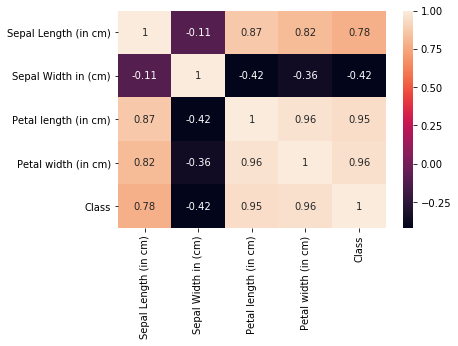

In [8]:
#Pictorial representation of association between each variable with target
sns.heatmap(iris.corr(),annot=True)

#Insight: Sepal Length, Sepal Width, Petal Width and Petal Length are strongly correlated with Target Species.

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [9]:
#Variance of independent variable
iris.var()

Sepal Length (in cm)    0.685694
Sepal Width in (cm)     0.188004
Petal length (in cm)    3.113179
Petal width (in cm)     0.582414
Class                   0.671141
dtype: float64

#Insight: All features has some influence over the target.

## Question 6

*Plot the scatter matrix for all the variables.*

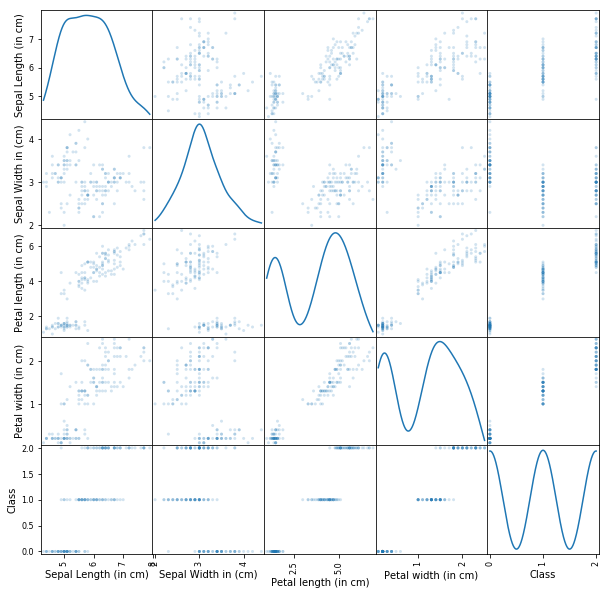

In [10]:
#Plot Scatter_Matrix
pd.plotting.scatter_matrix(iris, alpha=0.2, figsize=[10,10], diagonal='kde')
plt.show()


## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [11]:
#Split dataset to train and test data
#Split dataset into features and target variable
feature_cols = columns=['Sepal Length (in cm)','Sepal Width in (cm)','Petal length (in cm)',
         'Petal width (in cm)']
X = iris[feature_cols] # Features
y = iris.Class # Target variable

#Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=1)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [12]:
#Build the model and train and test on train and test data respectively
#K values=3,5,9
n_neigh=[3,5,9]
score=[]
for i in  n_neigh:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    ypred = knn.predict(X_test)
    score.append(metrics.accuracy_score(y_test,ypred))
    print("Accuracy of", str(i) +" is: " + str(score[-1] ))

Accuracy of 3 is: 1.0
Accuracy of 5 is: 1.0
Accuracy of 9 is: 0.9666666666666667


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [13]:
#Empty list that will hold cv scores
cv_scores = []
k_neighbors = []
k=np.arange(1,20,2)

#Creating odd list of K for KNN
myList = list(range(1,50))

#Perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)

#Caluculate Miss Classification Error
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 6


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

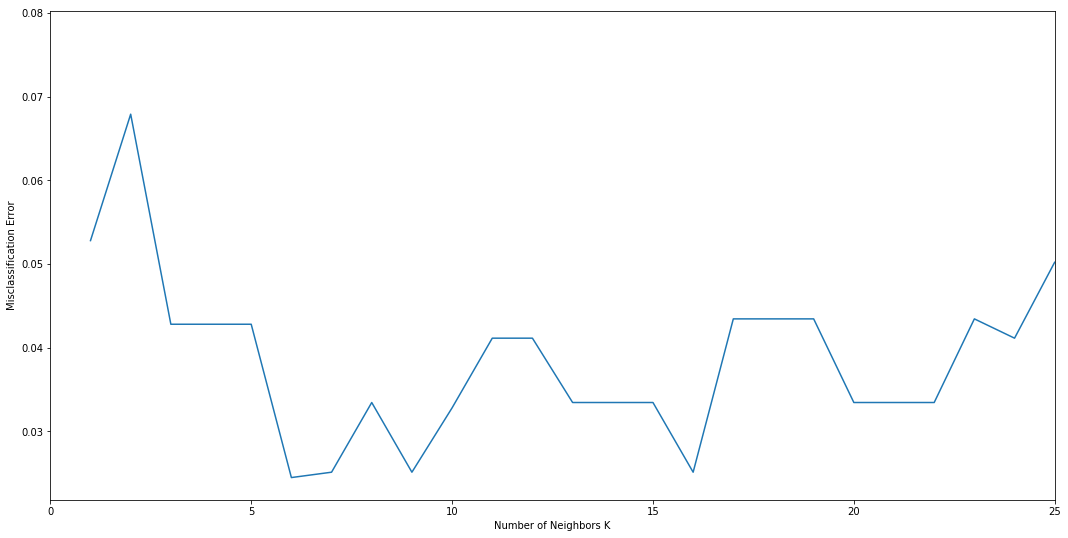

In [14]:
#Plot missclassification error vs K
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,25)

# plot misclassification error vs k
plt.plot(k_neighbors, MSE)

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

# Naive Bayes with Iris Data

In [15]:
#Load all required library
%matplotlib inline
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

In [16]:
#Pre loaded IRIS data
#Load IRIS data
preload_iris_data=datasets.load_iris()

#Set column names
columns=['Sepal Length','Sepal Width','Petal length','Petal width']

#Set Feature variable
iris_data=pd.DataFrame(preload_iris_data['data'],columns=columns)

#Set target variable
iris_data['Species']=preload_iris_data['target']

#Name the class variable values: 0 - Senosta, 1 - Versicolor and 2 - Virginia.
iris_data['Species']=iris_data['Species'].apply(lambda x:preload_iris_data['target_names'][x])

#Print head of dataframe
iris_data.head()

,Sepal Length,Sepal Width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [17]:
#Split dataset into features(Independent variables) and target variable(Dependent Variable)
X = iris_data[columns] # Features
y = iris_data.Species # Target variable

In [18]:
#Check the dataset
print(y)
print(X)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
5         setosa
6         setosa
7         setosa
8         setosa
9         setosa
10        setosa
11        setosa
12        setosa
13        setosa
14        setosa
15        setosa
16        setosa
17        setosa
18        setosa
19        setosa
20        setosa
21        setosa
22        setosa
23        setosa
24        setosa
25        setosa
26        setosa
27        setosa
28        setosa
29        setosa
         ...    
120    virginica
121    virginica
122    virginica
123    virginica
124    virginica
125    virginica
126    virginica
127    virginica
128    virginica
129    virginica
130    virginica
131    virginica
132    virginica
133    virginica
134    virginica
135    virginica
136    virginica
137    virginica
138    virginica
139    virginica
140    virginica
141    virginica
142    virginica
143    virginica
144    virginica
145    virginica
146    virginica
147    virgini

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

In [19]:
#Estimate distribution of target variable(Species)
iris_data['Species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: Species, dtype: int64

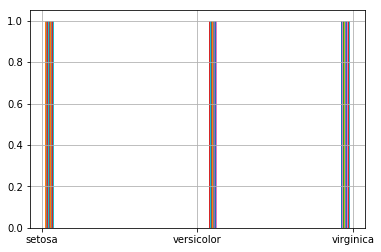

In [20]:
#Plot distribution of target variable using histogram
iris_data['Species'].hist()

In [ ]:
#Drop Id variable from data
#In the given data set, there is no ID column. The syntax to remove the ID column from 
#dataset is as follows:
iris_data = iris_data.drop(['Id'],axis=1)

### Question 12 
Find Correlation among all variables and give your insights 

In [21]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
#it can lead to over inflating importance.We will ignore it here

In [22]:
#Converts categorical data to numerical data
le = preprocessing.LabelEncoder()
iris_data['Species']=le.fit_transform(iris_data['Species'])
iris_data.sample(5)

,Sepal Length,Sepal Width,Petal length,Petal width,Species
125,7.2,3.2,6.0,1.8,2
130,7.4,2.8,6.1,1.9,2
41,4.5,2.3,1.3,0.3,0
14,5.8,4.0,1.2,0.2,0
93,5.0,2.3,3.3,1.0,1


In [23]:
#Find Correlation of each variables
iris_data.corr()

,Sepal Length,Sepal Width,Petal length,Petal width,Species
Sepal Length,1.000000,-0.117570,0.871754,0.817941,0.782561
Sepal Width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
Petal length,0.871754,-0.428440,1.000000,0.962865,0.949035
Petal width,0.817941,-0.366126,0.962865,1.000000,0.956547
Species,0.782561,-0.426658,0.949035,0.956547,1.000000


In [24]:
#Insight: Sepal Length, Sepal Width, Petal Width and Petal Length are strongly correlated with Target Species.
#Sepal Length is highly correlated with Petal length and Petal width.
#Petal length is highly correlated with Sepal length and Petal width.
#Petal width is highly correlated with Sepal Length  and Petal length.

#From the above inference, it is seen that each of the varuiable is correlated to each other. In this case ideally we 
#have to remove correlated variable fROM the dataset as they are voted twice. Since the dataset is small and if remove the columns,
#there would not be much columns left for us to perform any modeling operation on  it. And, hence if ignored the correlation.

### Split data in Training and test set in 80:20.

In [25]:
#Split dataset to train and test data.
#Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=1)

### Question 13 
Do Feature Scaling 

In [26]:
#Use StandardScaler or similar methods

In [27]:
sc=StandardScaler()
sc.fit_transform(X)

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

### Question 14 
Train and Fit NaiveBayes Model

In [28]:
#Fit the model
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print(gnb)

GaussianNB(priors=None, var_smoothing=1e-09)


In [29]:
#Predict
predicted = gnb.predict(X_test)
predicted

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica'],
      dtype='<U10')

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [30]:
#Show Confusion Matrix
metrics.confusion_matrix(predicted, y_test)

array([[11,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  6]], dtype=int64)

In [31]:
#Show accuracy
model_score = gnb.score(X_test, y_test)
model_score

0.9666666666666667

In [32]:
#Show precision and Recall metrics

In [33]:
pd.DataFrame(data=[metrics.recall_score(y_test, predicted,average=None),
                   metrics.precision_score(y_test, predicted,average=None)], 
             index=["recall", "precision"])

,0,1,2
recall,1.0,0.923077,1.000000
precision,1.0,1.000000,0.857143


In [ ]:
#Not attempting the below practice questions as SVM model is not covered in current residency.

# For Practice  - Optional

All the questions from 16 to 20 are for practice.

# Using SVM with Diebetes Dataset

In [0]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 16 
Read the input file 'Diabetes.csv' using Pandas and check it's column names.

Check dimension of dataset.

Check distribution of dependent variable, Outcome and plot it.


In [0]:
# Eye ball the imported dataset

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [0]:
# Check data types and info of dataset

# Question 17 
Check data distribution using summary statistics and provide your findings.

Do correlation analysis and bivariate viualization with Insights


# Question 18 
Do train and test split. 
Optionally - You can do with stratify sampling(optional) on Outcome variable to maintain the distribution of dependent variable

# Question 19 
Train Support Vector Machine Model(1 Marks)

In [0]:
# use from sklearn.svm import SVC

In [0]:
# your insights

# Question 20
Scale the data points using MinMaxScaler

Fit SVM Model on Scale data and give your observation

#we can try increasing either C or gamma to fit a more complex model.

# Optional Question - 
Try improving the model accuracy using C=1000 (1 Marks)

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [0]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [0]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [0]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [0]:
gs.fit(X_train_scaled, y_train) 

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [0]:
gs.best_estimator_

SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
gs.best_score_ 

0.77777777777777779